In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [5]:
train_images, test_images = train_images/255, test_images/255
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),
  keras.layers.Dropout(0.2),                               
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.Dense(32, activation = 'relu'),                              
  keras.layers.Dense(10, activation = 'softmax')                              
])

In [7]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, batch_size =64,
                    epochs =200, validation_split = 0.25)

Epoch 1/200
704/704 [==============================] - 4s 5ms/step - loss: 0.3004 - accuracy: 0.8861 - val_loss: 0.3130 - val_accuracy: 0.8857
Epoch 2/200
704/704 [==============================] - 3s 4ms/step - loss: 0.2935 - accuracy: 0.8901 - val_loss: 0.3150 - val_accuracy: 0.8866
Epoch 3/200
704/704 [==============================] - 3s 4ms/step - loss: 0.2889 - accuracy: 0.8909 - val_loss: 0.3083 - val_accuracy: 0.8905
Epoch 4/200
704/704 [==============================] - 3s 4ms/step - loss: 0.2834 - accuracy: 0.8921 - val_loss: 0.3122 - val_accuracy: 0.8881
Epoch 5/200
704/704 [==============================] - 3s 4ms/step - loss: 0.2797 - accuracy: 0.8942 - val_loss: 0.3127 - val_accuracy: 0.8852
Epoch 6/200
704/704 [==============================] - 3s 4ms/step - loss: 0.2737 - accuracy: 0.8961 - val_loss: 0.3128 - val_accuracy: 0.8872
Epoch 7/200
704/704 [==============================] - 3s 4ms/step - loss: 0.2696 - accuracy: 0.8970 - val_loss: 0.3282 - val_accuracy: 0.8821

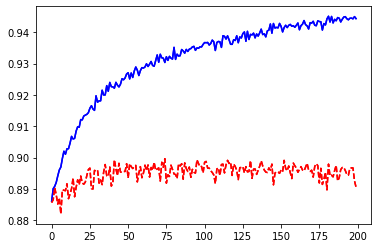

In [8]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)
print("테스트 정확도:", test_acc)

313/313 - 0s - loss: 0.3989 - accuracy: 0.8897
테스트 정확도: 0.8896999955177307


In [22]:
train_images = train_images.reshape(60000,784) #정규화
print(train_images.shape)
test_images = test_images.reshape(10000,784) #표준화
print(test_images.shape)

(60000, 784)
(10000, 784)


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images)

scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)

scaler = MinMaxScaler()
test_images = scaler.fit_transform(test_images)

scaler = StandardScaler()
test_images = scaler.fit_transform(test_images)

In [36]:
train_images, test_images = train_images, test_images
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),
  #keras.layers.Dropout(0.2),                               
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.Dense(128, activation = 'relu'),                              
  keras.layers.Dense(64, activation = 'relu'),                              
  keras.layers.Dense(10, activation = 'softmax')                              
])

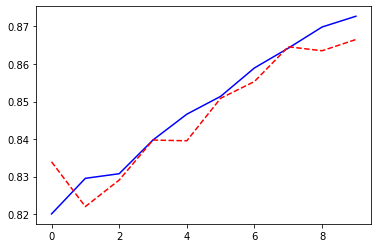

In [37]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')